### Load libraries : 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Load the Dataset : 

In [102]:
species_data = pd.read_csv('../Data/species.csv', index_col=0)

# make a copy of the datset 
data = species_data.copy(deep=True)

In [103]:
data.head()

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,...,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,...,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,...,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,...,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,...,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156


In [120]:
data.nunique().sort_values(ascending=False)

site                           400
Longitude                      400
Latitude                       400
Diversity_index                400
NPP                            398
Wave_exposure                  398
SST                            396
Coral_area_UFRTM_200km         396
Random                         389
FSA                            386
Depth                          371
Coral_area_UFRTM_20km          361
Pop_per_area_reef_20km         328
Nursery_mangroves              312
MAX_HARD_RELIEF                300
Reef_complexity                300
Nursery_seagrass               289
Population_20km                260
PCT_CORAL                      257
Population_50km                257
Coral_cover                    257
Recreational_fishermen_50km    250
Tourist_fishing                246
Deepwater                      188
Marina_slips_25km              181
Marina_slips_10km              147
impact                          86
Total_gravity_intercept         65
Total_gravity       

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [105]:
data.describe()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
count,3999.000000,3999.000000,3999.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3910.000000,3.998000e+03,3999.000000,3999.000000,2779.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000
mean,2012.886222,25.361813,-80.912910,12.031226,4.549820,1.100154,23.760696,523.320811,7.322459,76727.255314,...,0.424433,6.312866e+05,6.386781,5047.471618,0.400637,2012.886222,4.549820,1.100154,3.115779,0.831469
std,3.629448,0.806724,1.051129,6.942690,5.522744,0.851008,0.552442,163.404174,0.211270,44693.794158,...,2.247541,4.861803e+05,11.092795,2919.598275,0.281552,3.629448,5.522744,0.851008,0.998422,0.114777
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,...,-0.185000,1.706314e+05,0.000000,1.000000,0.000000,2005.000000,0.000000,0.075887,2.000000,0.000000
25%,2011.000000,24.632586,-81.695419,6.351316,1.500000,0.500000,23.608484,365.925385,7.294437,50594.000000,...,-0.185000,2.469954e+05,0.039136,2550.500000,0.174000,2011.000000,1.500000,0.500000,2.000000,0.811582
50%,2013.000000,25.123213,-80.292226,10.171806,2.758143,0.900596,23.929285,533.677063,7.368210,60682.000000,...,-0.185000,3.180504e+05,0.248873,5097.000000,0.382000,2013.000000,2.758143,0.900596,4.000000,0.867035
75%,2016.000000,26.034196,-80.092946,17.148568,5.283544,1.448243,24.200861,632.628479,7.455595,91516.000000,...,0.044000,8.556702e+05,12.681632,7602.000000,0.694000,2016.000000,5.283544,1.448243,4.000000,0.900148
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,...,12.140000,1.511066e+06,55.371104,9997.000000,1.000000,2018.000000,55.000000,10.538338,8.000000,0.956324


### Duplicated columns :

In [106]:
# Step 1: Normalize the column names to a consistent case (e.g., lower case)
normalized_columns = data.columns.str.lower()

# Step 2: Check for duplicates in the normalized names
duplicates = normalized_columns[normalized_columns.duplicated()].unique()

# Step 3: Identify the original column names corresponding to the duplicates
duplicate_columns = [col for col in data.columns if col.lower() in duplicates]

duplicate_columns

['Year', 'Region', 'YEAR', 'REGION']

In [107]:
# Removing the columns named YEAR and REGION

data.drop(labels=['YEAR','REGION'], axis=1, inplace=True)

### Handling Missing Data : 

In [108]:
# Determine the percentage of missing data in each column
missing_data = data.isnull().mean() * 100

missing_data[missing_data > 0].sort_values(ascending=False)

BNP                         93.523381
DryTortugas                 84.321080
CoralECA                    65.891473
FKNMS                       58.539635
Keys_Divisions              35.733933
impact                      30.507627
Reef_complexity             17.679420
Coral_cover                 17.679420
PCT_CORAL                   17.679420
MAX_HARD_RELIEF             17.679420
connectivity                15.578895
Total_gravity_intercept      2.575644
Total_gravity                2.575644
Comm_engagement              2.225556
Rec_reliance                 2.225556
Rec_engagement               2.225556
Comm_reliance                2.225556
Commercial_pounds_landed     0.025006
dtype: float64

### EDA :

combine the 4 first column with the bigest missing value in one column (4 sites) ['BNP', 'DryTortugas', 'CoralECA', 'FKNMS'] in one column 

for the Keys_Divisions column what should we do ??

In [109]:

# Define the column names
columns = ['BNP', 'DryTortugas', 'CoralECA', 'FKNMS']

# Combine the columns into one
data['Combined_sites'] = data[columns].apply(lambda row: row.dropna().iloc[0] if row.dropna().size > 0 else np.nan, axis=1)

# Drop the old columns
data.drop(columns, axis=1, inplace=True)

data['Keys_Divisions'] : NAs represent sites outside the Florida Keys, ensuring that the analysis can differentiate between Florida Keys-specific and non-specific data.

OR maybe we can fiil them depending on the other 4 sites

In [110]:
# Fill missing values for categorical columns with a placeholder (e.g., 'Unknown')
data.fillna({'Keys_Divisions': 'Unknown'}, inplace=True)


In [111]:
missing_data = data.isnull().mean() * 100

missing_data[missing_data > 0].sort_values(ascending=False)

impact                      30.507627
Coral_cover                 17.679420
PCT_CORAL                   17.679420
MAX_HARD_RELIEF             17.679420
Reef_complexity             17.679420
connectivity                15.578895
Combined_sites               2.600650
Total_gravity_intercept      2.575644
Total_gravity                2.575644
Comm_engagement              2.225556
Rec_engagement               2.225556
Rec_reliance                 2.225556
Comm_reliance                2.225556
Commercial_pounds_landed     0.025006
dtype: float64

Correlation with Target:
Diversity_index                1.000000
SST                            0.190502
impact                         0.152961
SG_permits_50km                0.125085
Longitude                      0.119499
Keys_Divisions                 0.111166
connectivity                   0.110521
Nursery_seagrass               0.109616
Coral_area_UFRTM_200km         0.106499
Coral_area_UFRTM_20km          0.102702
Region                         0.097125
Marina_slips_25km              0.093112
Rec_reliance                   0.080419
Habitat_type_classLV2          0.079168
Depth_Sbrocco                  0.079008
no.divers                      0.074593
Recreational_fishermen_50km    0.063041
Random                         0.059735
Tourist_fishing                0.057262
Population_50km                0.055674
Month                          0.051447
site                           0.050327
Pop_per_area_reef_20km         0.047763
Population_20km                0.038220
Artificial_reef


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\AbdessalemDjoudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\AbdessalemDjoudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py"

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\AbdessalemDjoudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\AbdessalemDjoudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py"

AttributeError: _ARRAY_API not found

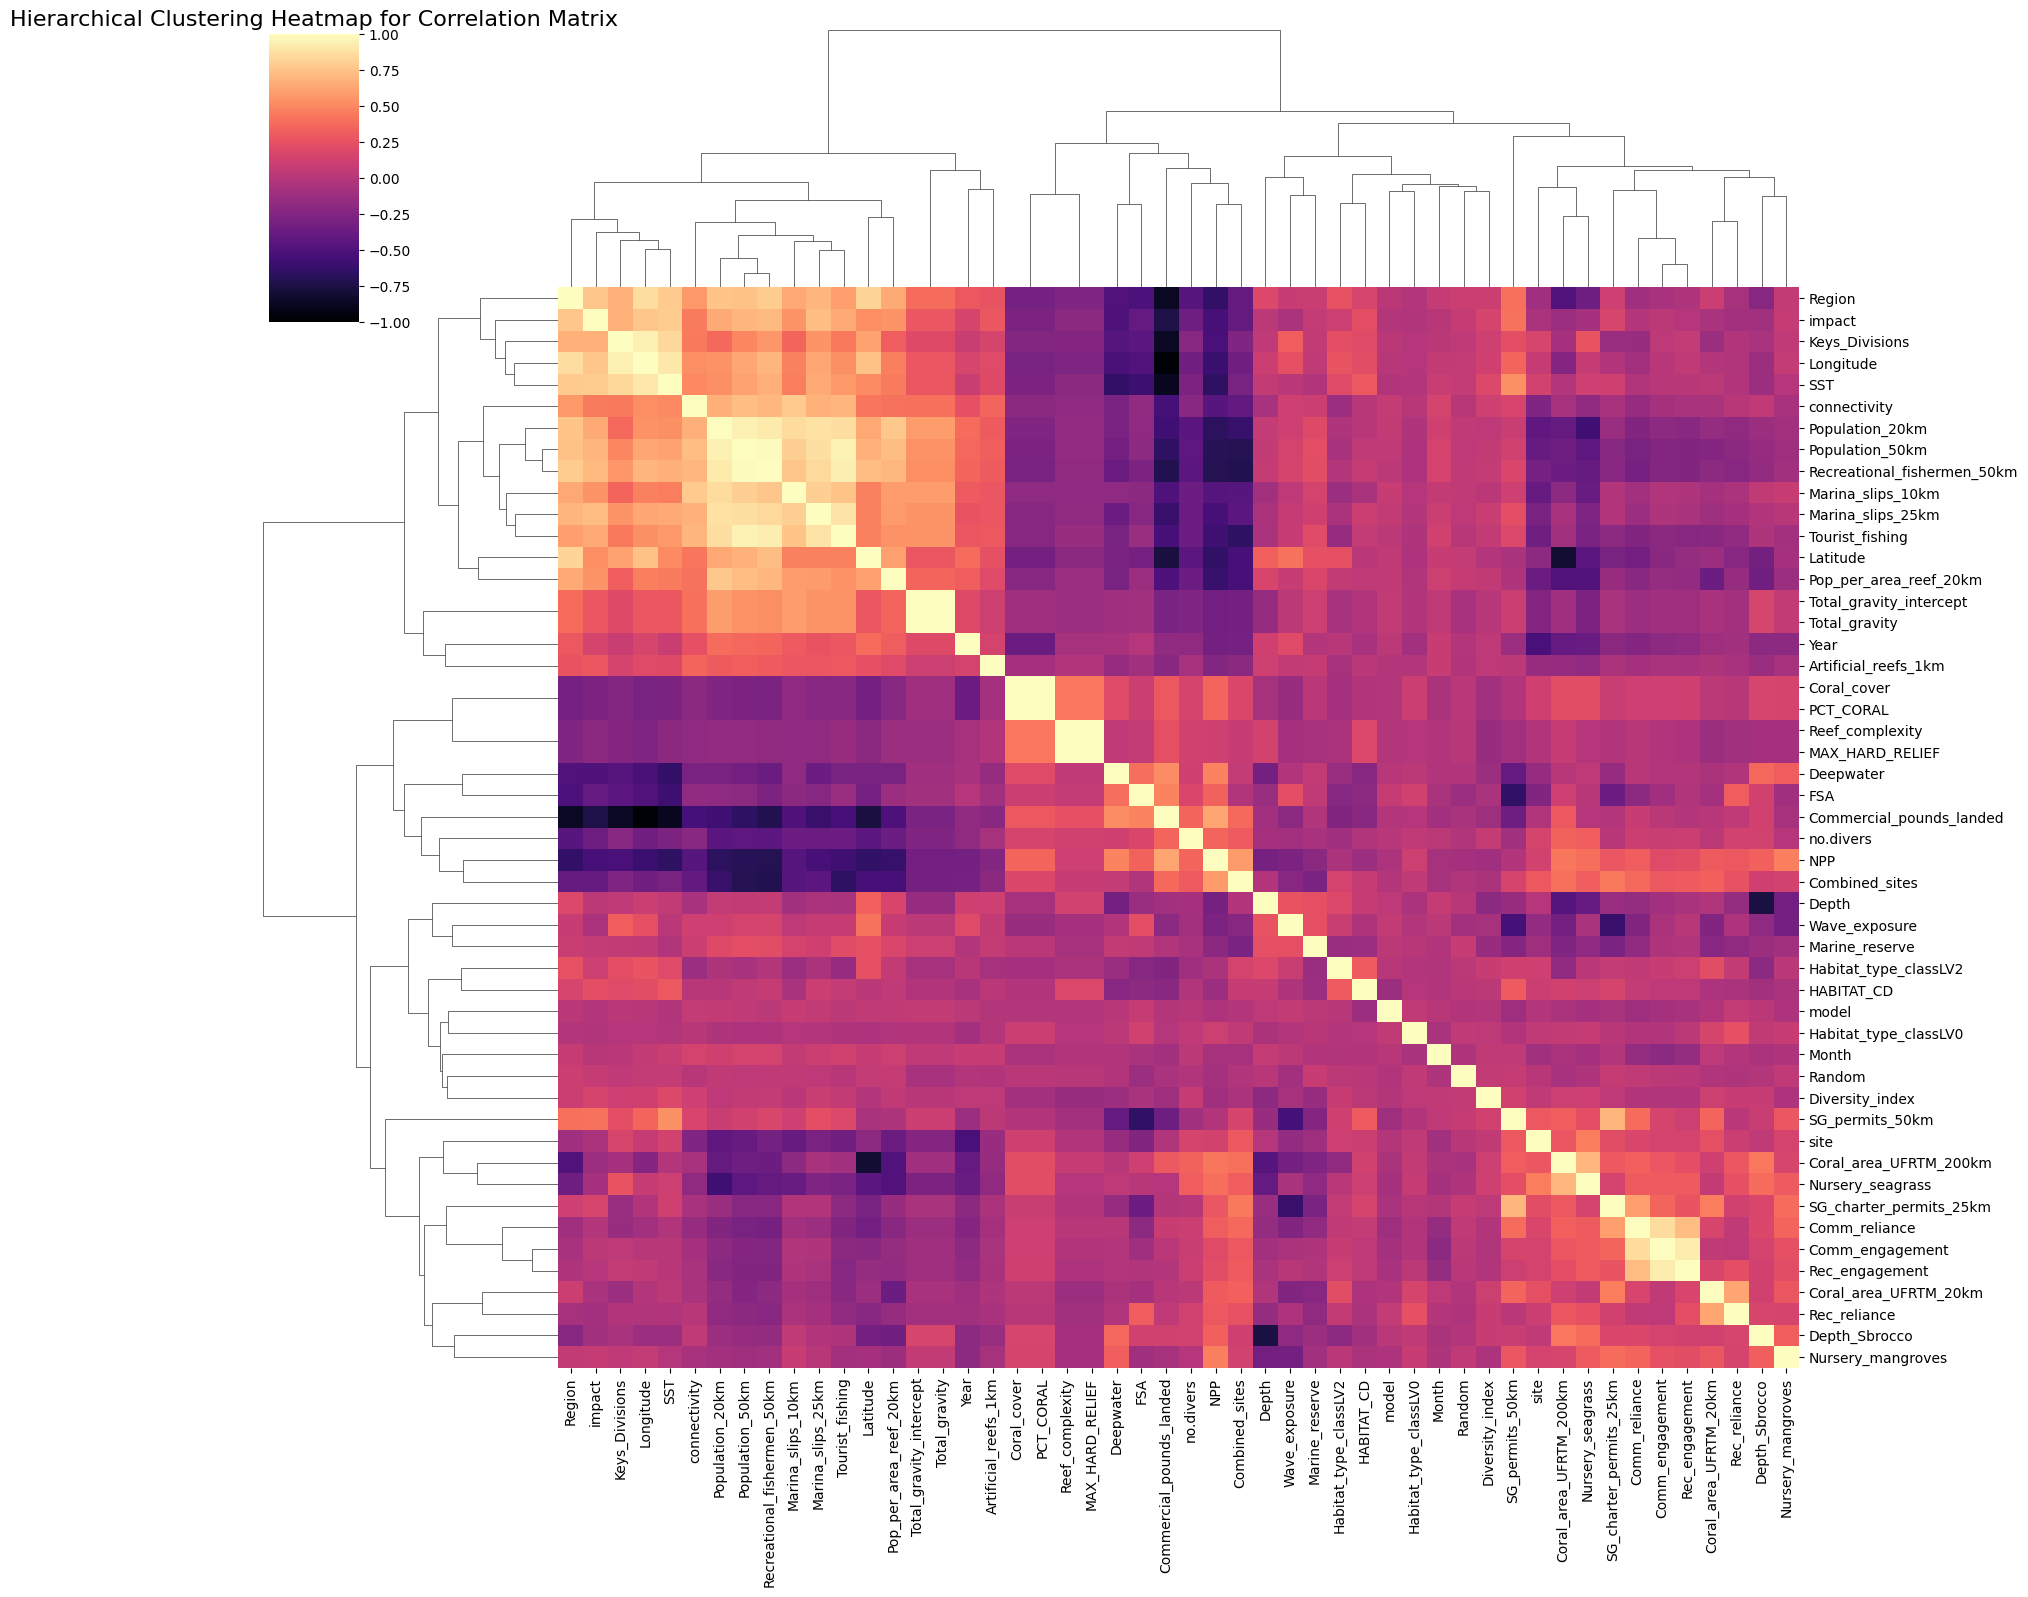


Feature Importance:
Depth                          1.157083e-01
Longitude                      7.421008e-02
NPP                            7.090538e-02
Deepwater                      6.492058e-02
impact                         4.890616e-02
Random                         4.538659e-02
PCT_CORAL                      4.056737e-02
Reef_complexity                4.022268e-02
SST                            4.013453e-02
Year                           3.478393e-02
Nursery_mangroves              3.319443e-02
MAX_HARD_RELIEF                3.283707e-02
FSA                            3.185717e-02
Wave_exposure                  3.167225e-02
Latitude                       2.658581e-02
Coral_cover                    2.607297e-02
Coral_area_UFRTM_200km         2.230986e-02
Coral_area_UFRTM_20km          1.998649e-02
Depth_Sbrocco                  1.783161e-02
Total_gravity_intercept        1.355456e-02
Nursery_seagrass               1.204947e-02
connectivity                   1.200541e-02
site       

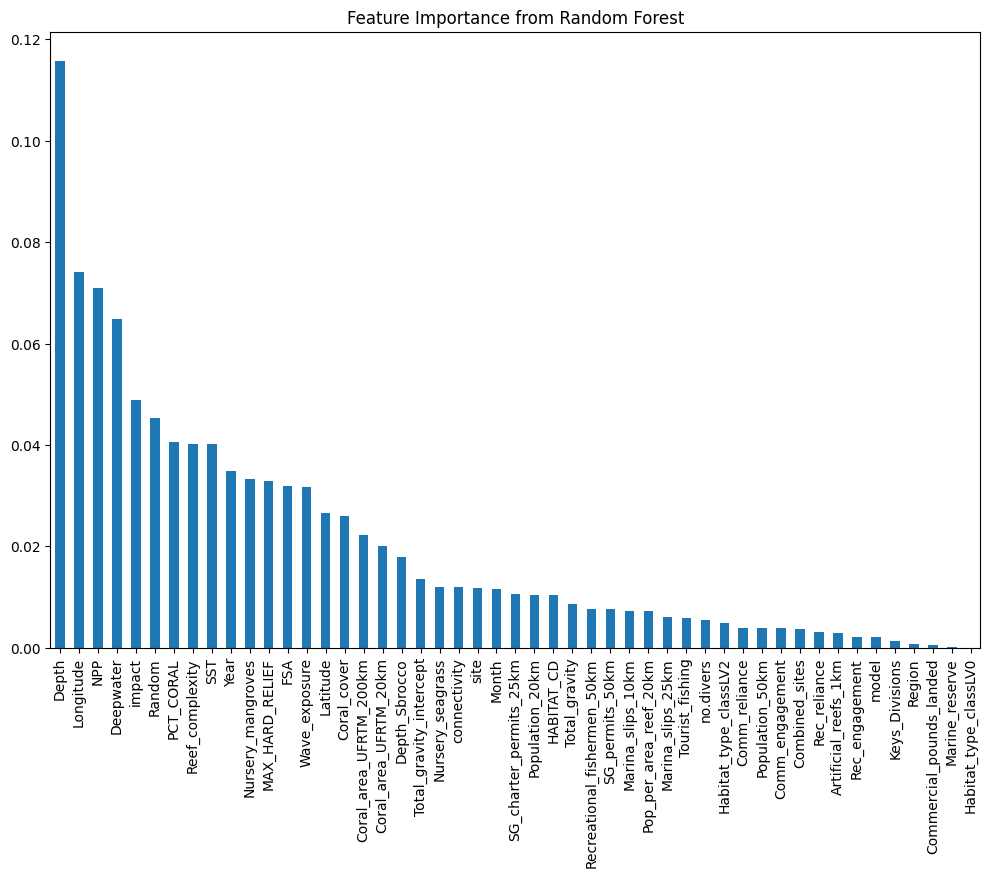

RMSE: 0.15707035848318424


C:\Users\AbdessalemDjoudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [113]:

from sklearn.preprocessing import LabelEncoder

# Handle missing values: fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Convert categorical columns to numeric using label encoding
non_numeric_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Replace any non-finite values in the correlation matrix with zero
correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
correlation_matrix.fillna(0, inplace=True)

correlation_with_target = correlation_matrix['Diversity_index'].sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

# Plot the heatmap for the correlation matrix with hierarchical clustering
sns.clustermap(correlation_matrix, annot=False, cmap='magma', vmin=-1, vmax=1, figsize=(18, 16))
plt.title('Hierarchical Clustering Heatmap for Correlation Matrix', size=16)
plt.show()

# Prepare the data for the model
# Separate features and target
X = data.drop(columns=['Diversity_index'])
y = data['Diversity_index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importance = rf.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

# Evaluate the model
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')
